In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from math import sqrt
import shap

In [2]:
pd.options.display.max_columns = None 
pd.options.display.max_rows = None 

In [3]:
iphone12_df = pd.read_csv('/data/p_dsi/teams2023/team2/asurion_data/iPhone12_Final.csv', parse_dates=['weeks_monday','month_year'])
iphone13_df = pd.read_csv('/data/p_dsi/teams2023/team2/asurion_data/iPhone13_Final.csv', parse_dates=['weeks_monday','month_year'])
iphone14_df = pd.read_csv('/data/p_dsi/teams2023/team2/asurion_data/iPhone14_Final.csv', parse_dates=['weeks_monday','month_year'])
iphone_df = pd.read_csv('/data/p_dsi/teams2023/team2/asurion_data/time_series_ML_features_final.csv', parse_dates=['weeks_monday','month_year'])

In [19]:
iphone10 = iphone_df[(iphone_df['phone_model'] == 'apple iphone x')]
iphone11 = iphone_df[(iphone_df['phone_model'] == 'apple iphone 11')]
iphone12 = iphone_df[(iphone_df['phone_model'] == 'apple iphone 12')]
iphone13 = iphone_df[(iphone_df['phone_model'] == 'apple iphone 13')]
iphone14 = iphone_df[(iphone_df['phone_model'] == 'apple iphone 14')]

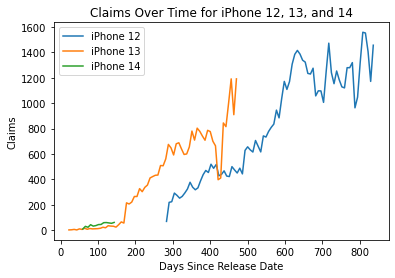

In [20]:
plt.plot(iphone12['days_since_release_date'], iphone12['claim'], label='iPhone 12')
plt.plot(iphone13['days_since_release_date'], iphone13['claim'], label='iPhone 13')
plt.plot(iphone14['days_since_release_date'], iphone14['claim'], label='iPhone 14')

plt.xlabel('Days Since Release Date')
plt.ylabel('Claims')
plt.title('Claims Over Time for iPhone 12, 13, and 14')
plt.legend()
plt.show()

## iPhone 12 vs 13

In [24]:
iphone12 = iphone_df[iphone_df['phone_model'] == 'apple iphone 12']
iphone12_overlap_13 = iphone12[(iphone12['days_since_release_date'] >= 297) & (iphone12['days_since_release_date'] <= 402)].reset_index()
iphone13 = iphone_df[iphone_df['phone_model'] == 'apple iphone 13']
iphone13_overlap_12 = iphone13[(iphone13['days_since_release_date'] >= 295) & (iphone13['days_since_release_date'] <= 400)].reset_index()
growth_perc = ((iphone13_overlap_12['claim'] - iphone12_overlap_13['claim']) / iphone12_overlap_13['claim']) * 100
avg_growth_perc = growth_perc.mean()
print("On average, iphone 13 has", round(avg_growth_perc, 3), "% more claims than iphone 12.")
avg_growth_decimal = avg_growth_perc * 0.01

diff = iphone13_overlap_12['claim'] - iphone12_overlap_13['claim']
avg_diff = np.mean(diff)
print("On average, iphone 13 has", round(avg_diff, 3), "more claims than iphone 12.")

On average, iphone 13 has 109.649 % more claims than iphone 12.
On average, iphone 13 has 351.312 more claims than iphone 12.


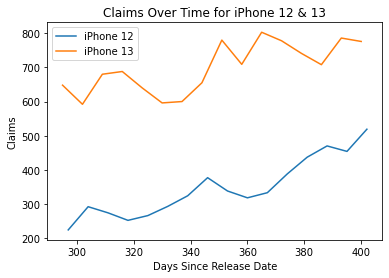

In [25]:
plt.plot(iphone12_overlap_13['days_since_release_date'], iphone12_overlap_13['claim'], label='iPhone 12')
plt.plot(iphone13_overlap_12['days_since_release_date'], iphone13_overlap_12['claim'], label='iPhone 13')

plt.xlabel('Days Since Release Date')
plt.ylabel('Claims') 
plt.title('Claims Over Time for iPhone 12 & 13')
plt.legend()
plt.show()

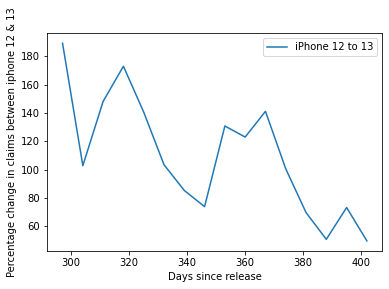

In [31]:
pct_change_12_13 = (iphone13_overlap_12['claim'] - iphone12_overlap_13['claim']) / iphone12_overlap_13['claim'] * 100
plt.plot(iphone12_overlap_13['days_since_release_date'], pct_change_12_13, label='iPhone 12 to 13')
plt.legend()
plt.xlabel('Days since release')
plt.ylabel('Percentage change in claims between iphone 12 & 13')
plt.show()

## iPhone 13 vs 14

In [32]:
iphone14 
iphone14_overlap_13 = iphone14.reset_index()
iphone13_overlap_14 = iphone13[(iphone13['days_since_release_date'] >= 57) & (iphone13['days_since_release_date'] <= 141)].reset_index()
growth_perc = ((iphone14_overlap_13['claim'] - iphone13_overlap_14['claim']) / iphone13_overlap_14['claim']) * 100
avg_growth_perc = growth_perc.mean()
print("On average, iphone 14 has", round(avg_growth_perc, 3), "% more claims than iphone 13.")
avg_growth_decimal = avg_growth_perc * 0.01
diff = iphone14_overlap_13['claim'] - iphone13_overlap_14['claim']
avg_diff = np.mean(diff)
print("On average, iphone 14 has", round(avg_diff, 3), "more claims than iphone 13.")

On average, iphone 14 has 163.383 % more claims than iphone 13.
On average, iphone 14 has 24.923 more claims than iphone 13.


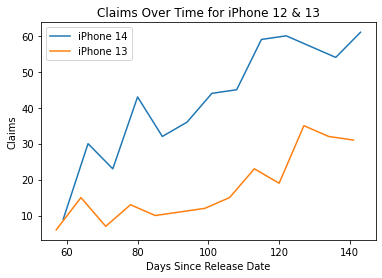

In [34]:
plt.plot(iphone14_overlap_13['days_since_release_date'], iphone14_overlap_13['claim'], label='iPhone 14')
plt.plot(iphone13_overlap_14['days_since_release_date'], iphone13_overlap_14['claim'], label='iPhone 13')

plt.xlabel('Days Since Release Date')
plt.ylabel('Claims')  
plt.title('Claims Over Time for iPhone 14 & 13')
plt.legend()
plt.show()

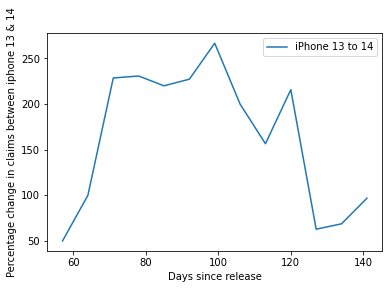

In [35]:
pct_change_13_14 = (iphone14_overlap_13['claim'] - iphone13_overlap_14['claim']) / iphone13_overlap_14['claim'] * 100
plt.plot(iphone13_overlap_14['days_since_release_date'], pct_change_13_14, label='iPhone 13 to 14')
plt.legend()
plt.xlabel('Days since release')
plt.ylabel('Percentage change in claims between iphone 13 & 14')
plt.show()